This project is a side project as part of a course I took that takes data on Titanic passengers and attempts to find factors that hopefully predict the likelyhood of a passenger to have survived the sinking.

In [61]:
import pandas as pd
from pandas import Series, DataFrame

In [62]:
titanic_df = pd.read_csv('train.csv')

In [63]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [64]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [65]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [66]:
#import what we will need for analysis/visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

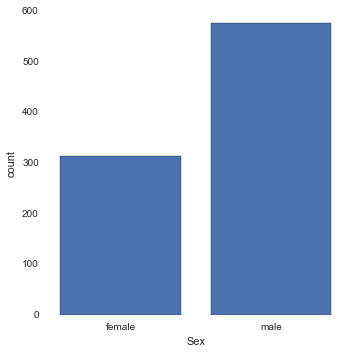

In [67]:
#To Check gender of the people
sns.factorplot('Sex',data=titanic_df)

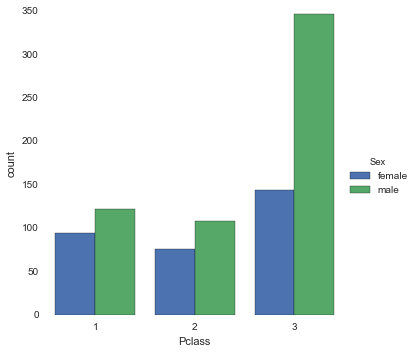

In [68]:
#We can compare genders by classes, using the 'hue' 
#argument
sns.factorplot('Pclass',data=titanic_df,hue='Sex')

In [69]:
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    #compare age, otherwise return the sex
    if age < 16:
        return 'child'
    else:
        return sex
    
# We want to define a new column called 'person, remember
#to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [70]:
#let's verify by checking first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


In [71]:
titanic_df[['Age','Sex']].head()

,Age,Sex
0,22,male
1,38,female
2,26,female
3,35,female
4,35,male


In [72]:
#Not needed, just working with column creation
def check_luck(passenger):
    fare,survived = passenger
    if fare > 50 and survived == 0:
        return 'unlucky'
    else:
        return 'lucky'
titanic_df['lucky?']=titanic_df[['Fare','Survived']].apply(check_luck,axis=1)

In [73]:
titanic_df[0:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,lucky?
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,lucky
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,lucky
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,lucky
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,lucky
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,lucky
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,lucky
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,unlucky
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,lucky
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,lucky
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,lucky


In [74]:

#This was important to make this distincion between women/
#men and children, as the gender only becomes significant
#when dealing with older people, given the context of the 
#problem.


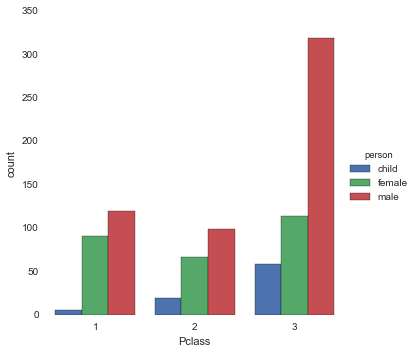

In [75]:
#Let's try the factor plot again
sns.factorplot('Pclass',data=titanic_df,hue='person')

Let's note how many children are in third class compared to 1st! We should now create a distribution of the ages to get a more precise picture of who the passengers were.

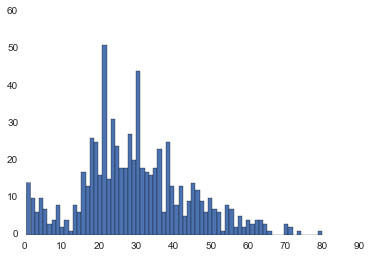

In [76]:
#Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

We can also get a quick overall comparison of male, female and children amounts

In [77]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

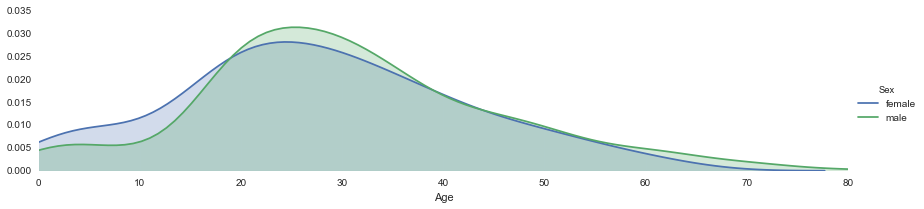

In [78]:
#Another way to visualize the data is to use FacetGrid to 
#plot multiple kdeplots on one plot.

# Set the figure equal to a facetgrid with the pandas 
# DataFrame as its data source, set the hue, and change the
# aspect ratio.

fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 
# "Age" column by the hue choice.

fig.map(sns.kdeplot,'Age',shade = True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old, set the x
# Lower limit to 0.

fig.set(xlim=(0,oldest))

# Finally, add a legend
fig.add_legend()


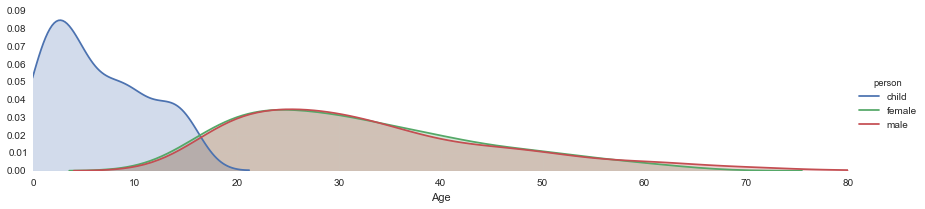

In [79]:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

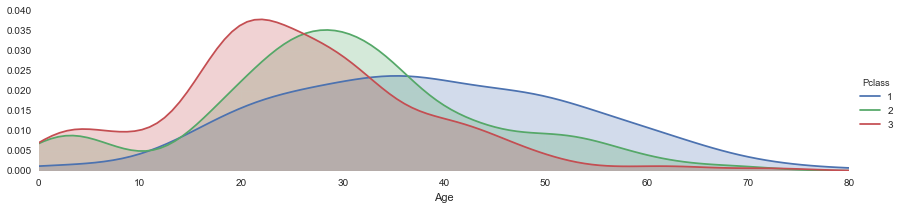

In [80]:
#Let's do the same for class by changing the hue argument.
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

On to our second question: What deck were the passengers on and how did that relate to their class????

In [81]:
#Let's get a quick look at our dataset again.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,lucky?
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,lucky
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,lucky
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,lucky
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,lucky
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,lucky


We see that the cabin column as information on the deck, but has several null (NaN) values, so we'll have to drop those entries.

In [82]:
deck = titanic_df['Cabin'].dropna()

In [83]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Notice we only need the first letter of the deck value to classify its level (A,B,C,D,E,F,G)

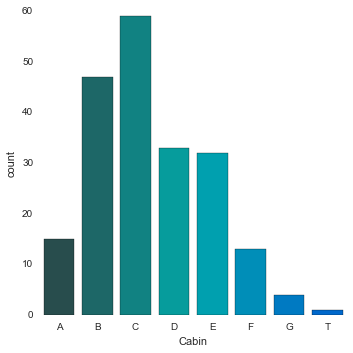

In [84]:
# So let's grab that letter for the deck level with a for
# loop

#Set empty list
levels = []

# Loop to grab first level of each cabin entry.
for level in deck:
    levels.append(level[0])

#Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d')


We want to drop out the 'T' deck value, which we can with the following code:

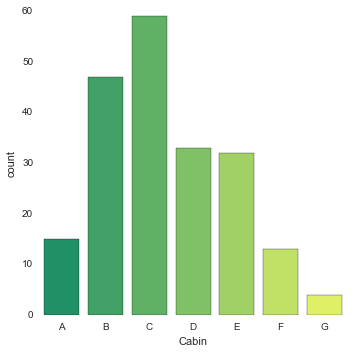

In [85]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,palette='summer')

We have sufficiently analyzed the distribution of the passengers by decks! Lets answer our third question: Where did the passengers come from????

In [86]:
#let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,lucky?
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,lucky
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,lucky
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,lucky
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,lucky
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,lucky


Note here: the Embarked column has C,Q, and S values; Reading about the project on Kaggle shows us that these stand for Cherbourg, Queenstown, and Southhampton.

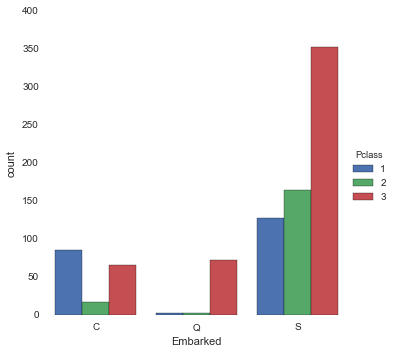

In [87]:
#Now we can make a quick factorplot to check out the results,
# note the x_order argument, used to deal with NaN values.
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',
              x_order=['C','Q','S'])

That sufficiently solves the question of where did the passengers come from; the fourth question: Who was alone and who was with family?????

In [88]:
# Let's start by adding a new column to define 'Alone'.

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
11    0
12    0
13    6
14    0
...
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    5
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passanger was with his/her family and were not alone.

In [89]:
#look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = 'Alone'

In [90]:
#To check
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,lucky?,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,lucky,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,lucky,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,lucky,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,lucky,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,lucky,Alone


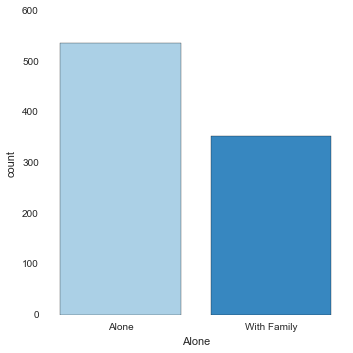

In [91]:
sns.factorplot('Alone',data=titanic_df,palette='Blues')

Now let's look at the most interesting question...What factors helped someone survive the sinking?????????

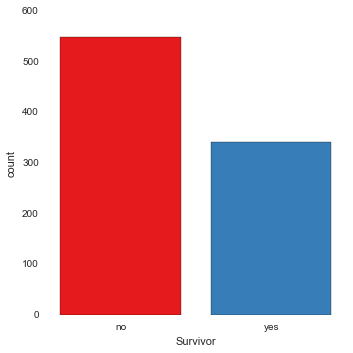

In [92]:
# Let's start by creating a new column for legibilty purposes 
# through mapping (lecture 36)
titanic_df['Survivor']=titanic_df.Survived.map({0: "no", 1: "yes"})
#Above code takes the 'Survived' column and if the value was 0,
# puts a "no" value in the new "Survivor" column and "yes" for 1.

#Let's just get a quick overall view of survived vs died.
sns.factorplot("Survivor",data=titanic_df,palette='Set1')

From this graph, many more people died than survived. Let's see if the class of the passenger had an effect on their survivor rate (the movie made this claim).

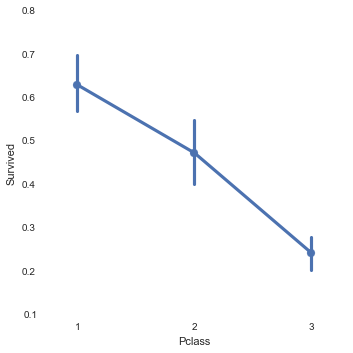

In [93]:
#TAKE NOTE: dont need descriptive statistics sometimes, a graph 
#This is very telling. Correlation wasn't needed to find meaning.
sns.factorplot('Pclass','Survived',data=titanic_df)

Looks like survival rates for the 3rd class are substantially lower! But maybe this effect is being casued by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

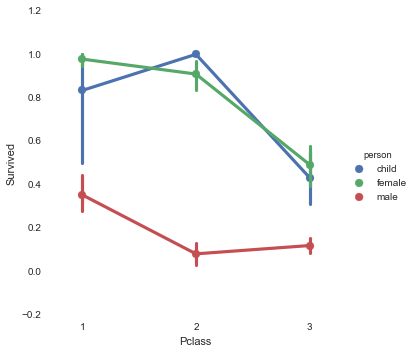

In [94]:
#Let's use a factor plot again, but now considering class and
# gender
sns.factorplot("Pclass","Survived",hue='person',data=titanic_df)

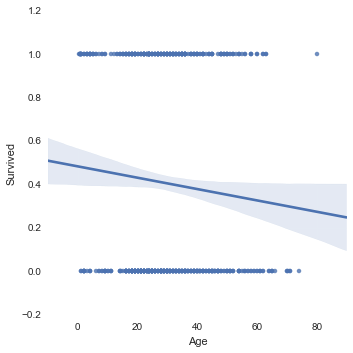

In [95]:
# Let's use a linear plot on age versus survival
# Important note: we choose lmplot, a linear plot with line of
#Best fit, because of the huge number of different ages. for 
# The previous plot, we only had 3 possible x values: 1, 2, or 3.
sns.lmplot('Age','Survived',data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

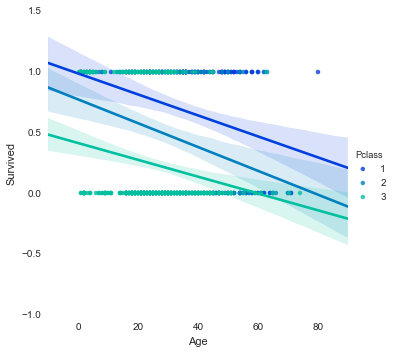

In [96]:
#Let's use a linear plot on age versus survival using hue for 
#Class separation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,
          palette='winter')

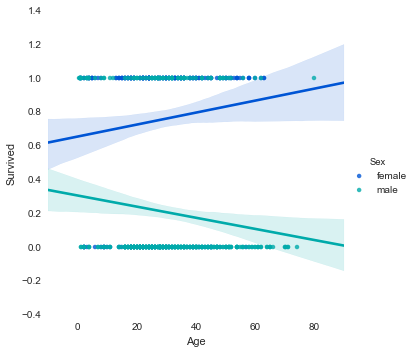

In [97]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter')

Lets look at some other questions: 
1) Did the deck have an effect on the passenger's survival rate? Did this answer match up with your intuition? 
2) Did having a family member increase the odds of surviving the crash?

In [98]:
titanic_df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [99]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [100]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,lucky?,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,lucky,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,lucky,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,lucky,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,lucky,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,lucky,Alone,no


In [101]:
new_df = titanic_df[pd.notnull(titanic_df['Cabin'])]

In [102]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,lucky?,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,lucky,With Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,lucky,With Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,unlucky,Alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,child,lucky,With Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female,lucky,Alone,yes


In [109]:
new_deck = new_df['Cabin']
new_level = []
for i in new_deck:
    new_level.append(i[0])
new_level[0:10]
new_df['Cabin_letter']=new_level

C:\Users\Jordan\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [113]:
new_df = new_df[new_df['Cabin_letter'] != 'T']

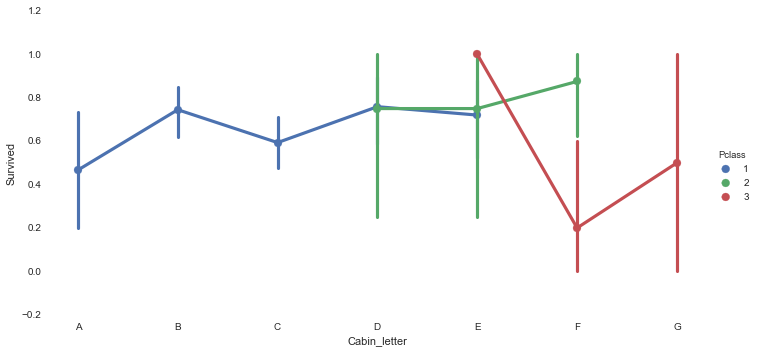

In [117]:
sns.factorplot('Cabin_letter','Survived',hue='Pclass',data=new_df,aspect=2)